In [1]:
# Import necessary packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set_theme(style = "darkgrid")


In [2]:
# Read the .csv data set
data = pd.read_csv("./input_data/Loan_Granting_Binary_Classification_2.csv")

#get the first few rows of the dataset 
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,"1,244.02",16.7,32.0,11,1,11275,14815,1.0,0.0
3,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
4,7e9f6759-6a13-48ef-adfa-ef9fbcfcfcc8,05301ee5-29ec-48b6-b3e5-0813ea25d684,Charged Off,11911,Short Term,7420.0,2 years,Home Mortgage,70475.0,other,886.81,17.7,NaN,13,0,28212,59897,0.0,0.0


In [3]:
# Understand the shape of the data
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 105549
Columns: 19


In [4]:
# check the data types and other information
# Before enconding and pre-processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105549 entries, 0 to 105548
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       105549 non-null  object 
 1   Customer ID                   105549 non-null  object 
 2   Loan Status                   105549 non-null  object 
 3   Current Loan Amount           105549 non-null  int64  
 4   Term                          105549 non-null  object 
 5   Credit Score                  84996 non-null   float64
 6   Years in current job          101038 non-null  object 
 7   Home Ownership                105549 non-null  object 
 8   Annual Income                 84996 non-null   float64
 9   Purpose                       105549 non-null  object 
 10  Monthly Debt                  105549 non-null  object 
 11  Years of Credit History       105549 non-null  float64
 12  Months since last delinquent  48887 non-null

In [5]:
# There are 19 columns (ie: features)
# 8 features are features so probably categorical (qualitative data)
# 11 features are numeric (quantitative data)

In [6]:
# Let's check if there are any missing values in the data
# before the data pre-processing
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    20553
Years in current job             4511
Home Ownership                      0
Annual Income                   20553
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    56662
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      221
Tax Liens                          11
dtype: int64

In [7]:
# There are several missing values in the following features
# Credit Score                   ---  20553 missing values
# Years in current job           ---  4511 missing values
# Annual Income                  ---  20553 missing values
# Months since last delinquent   ---   56662 missing values
# Since the count of each one of the features that have null
# vlaues or missing values  is less than %50 of the data size (105549)
# we can fill the null values with the mean value from theat feature

In [8]:
# we can fill the null values with the mean value from theat feature
data['Credit Score'].fillna(int(data['Credit Score'].mean()), inplace=True)
#data['Years in current job'].fillna(int(data['Years in current job'].mean()), inplace=True)
data['Annual Income'].fillna(int(data['Annual Income'].mean()), inplace=True)
data['Months since last delinquent'].fillna(int(data['Months since last delinquent'].mean()), inplace=True)
data['Bankruptcies'].fillna(int(data['Bankruptcies'].mean()), inplace=True)
data['Tax Liens'].fillna(int(data['Tax Liens'].mean()), inplace=True)



In [9]:
# Encoding of Categorical features
# “years_in_current_job” we just trim 
# the ‘year’ part and leave the years only
data["Years in current job"] = data["Years in current job"].replace({'-1': -1, '10+ years': 10, '8 years': 8, '6 years': 6, 
                                                                              '7 years': 7, '5 years': 5, '1 year': 1, '< 1 year': 0, 
                                                                              '4 years': 4, '3 years': 3, '2 years': 2, '9 years': 9})
print("Years in current job = ",data["Years in current job"] )

Years in current job =  0          0.0
1         10.0
2          9.0
3         10.0
4          2.0
          ... 
105544    10.0
105545    10.0
105546     5.0
105547    10.0
105548     0.0
Name: Years in current job, Length: 105549, dtype: float64


In [10]:
data['Years in current job'].fillna(int(data['Years in current job'].mean()), inplace=True)

In [11]:
# Let's check if there are any missing values in the data
# after the data pre-processing
data.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [12]:
# The features/columns names 
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [13]:
#####################################
## Analyze the numerical features
#####################################
data.describe()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.055490e+05,105549.000000,105549.000000,1.055490e+05,105549.000000,105549.000000,105549.000000,105549.000000,1.055490e+05,1.055490e+05,105549.000000,105549.000000
mean,1.142527e+07,1074.603757,5.849321,7.236810e+04,18.195536,34.420980,11.125127,0.167666,1.548655e+04,3.463958e+04,0.117187,0.029342
std,3.179220e+07,1320.832405,3.556259,4.308951e+04,7.022730,14.973661,5.012948,0.483888,1.980567e+04,3.736479e+05,0.350620,0.260566
min,4.910000e+02,585.000000,0.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.158000e+03,711.000000,3.000000,4.903200e+04,13.500000,34.000000,8.000000,0.000000,5.916000e+03,1.243500e+04,0.000000,0.000000
50%,1.417800e+04,733.000000,6.000000,7.236800e+04,16.900000,34.000000,10.000000,0.000000,1.104300e+04,2.127400e+04,0.000000,0.000000
75%,2.381000e+04,750.000000,10.000000,7.948300e+04,21.700000,34.000000,14.000000,0.000000,1.935400e+04,3.563400e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,10.000000,1.919760e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.000000,15.000000


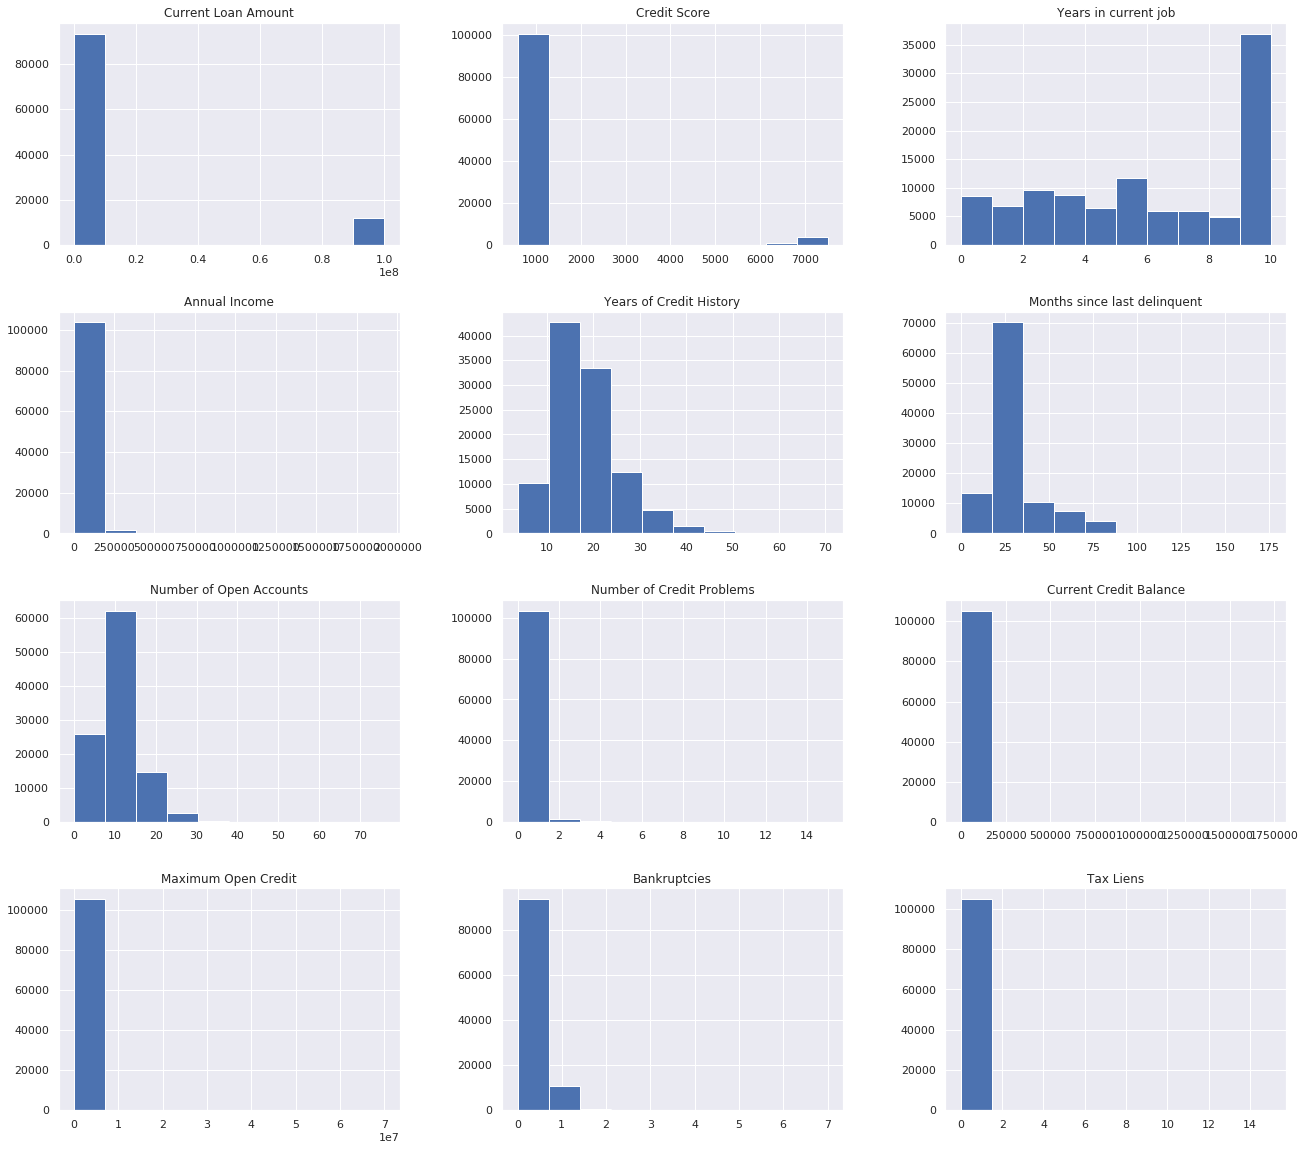

In [14]:
# Understand the data distribution
data.hist( figsize = (22, 20) )
plt.show()

In [15]:
# check the count of the target variable
data["Loan Status"].value_counts()

Fully Paid     81684
Charged Off    23865
Name: Loan Status, dtype: int64

In [16]:
# "Charged Off" means defaulted 
# about 25% of the people defaulted on their loan


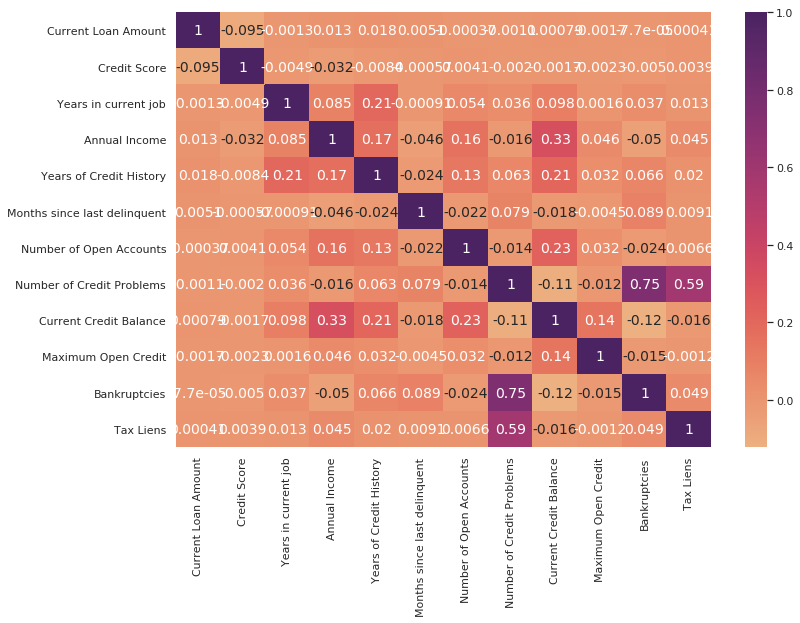

In [17]:
# plot the correlation plot
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

In [18]:
#####################################
## Analyze the categorical features
#####################################

In [19]:
# This is a method to create the plots for the categorical features
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (10,10) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

Home Mortgage    51067
Rent             44591
Own Home          9675
HaveMortgage       216
Name: Home Ownership, dtype: int64


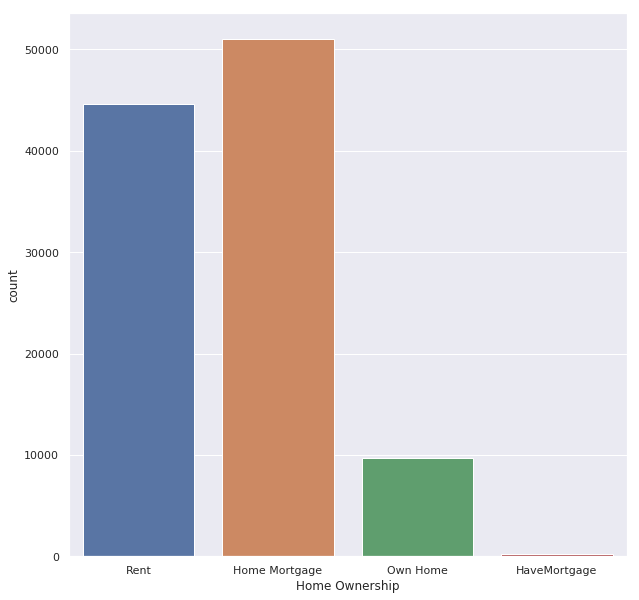

In [20]:
# Check feature "Home Ownership"
categorical_valcount_hist("Home Ownership")

10.0    32762
5.0     11722
2.0      9614
3.0      8695
0.0      8623
1.0      6813
4.0      6458
6.0      5988
7.0      5888
8.0      4816
9.0      4170
Name: Years in current job, dtype: int64


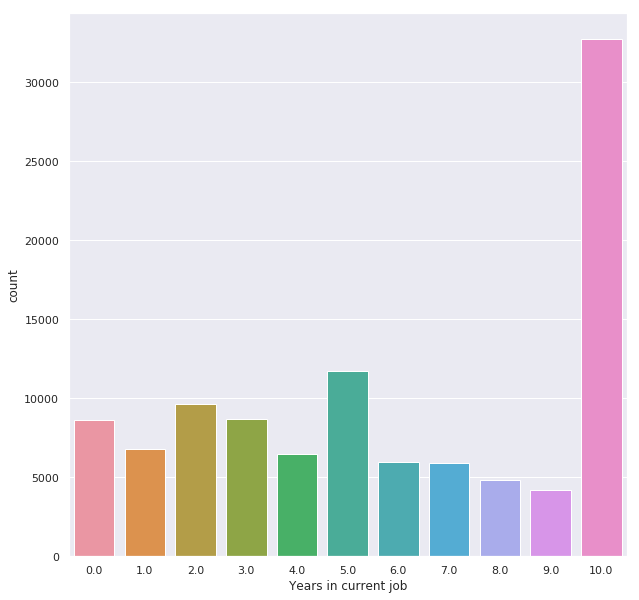

In [21]:
# Check feature "Years in current job"
categorical_valcount_hist("Years in current job")

In [22]:
# The majority have worked in the current job 10+ years

Short Term    76273
Long Term     29276
Name: Term, dtype: int64


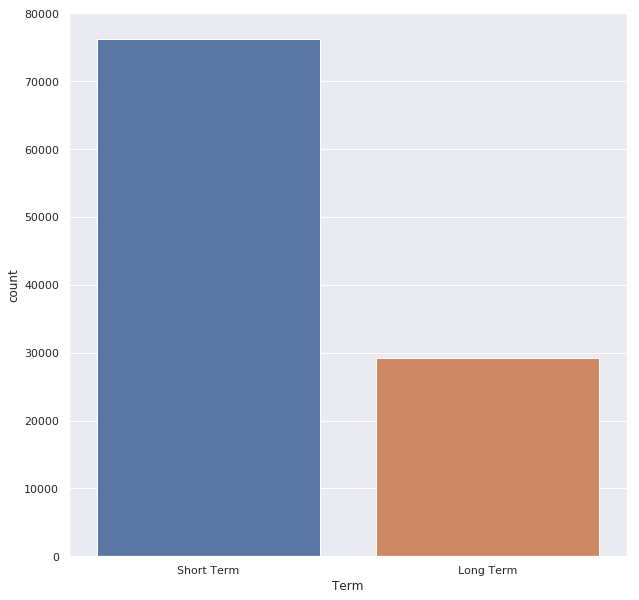

In [23]:
# Check feature "Term"
categorical_valcount_hist("Term")

In [24]:
# about 2/3 of the loans are "short term"

Debt Consolidation      82902
other                    6322
Home Improvements        6182
Other                    3417
Business Loan            1646
Buy a Car                1357
Medical Bills            1205
Buy House                 722
Take a Trip               592
major_purchase            398
small_business            300
moving                    163
wedding                   122
vacation                  106
Educational Expenses      104
renewable_energy           11
Name: Purpose, dtype: int64


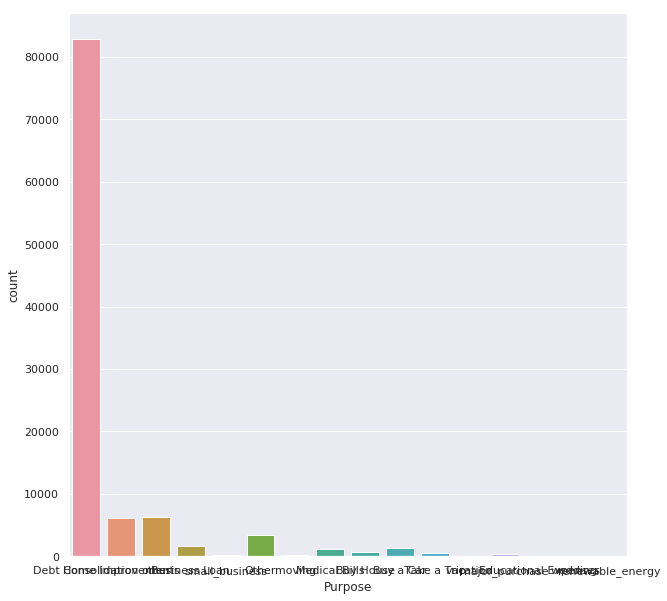

In [25]:
# Check feature "Purpose"
categorical_valcount_hist("Purpose")

In [26]:
!pip install --upgrade category_encoders

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

In [28]:
# Check count per "Monthly Debt"
#categorical_valcount_hist("Monthly Debt") 
print( "Total categories in Monthly Debt:", len( data["Monthly Debt"].unique() ) )
print()
print( data["Monthly Debt"].value_counts() )

Total categories in Monthly Debt: 68038

0           77
587.52       9
837          9
984.75       9
765          8
            ..
775.79       1
784.21       1
720.91       1
783.59       1
1,446.28     1
Name: Monthly Debt, Length: 68038, dtype: int64


In [29]:
onehot_encoder = OneHotEncoder(sparse = False)
data['Home Ownership'] = onehot_encoder.fit_transform(data['Home Ownership'].values.reshape(-1, 1) )
print("onehot_encoder for Home Owenership =",data['Home Ownership'])

onehot_encoder for Home Owenership = 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
105544    0.0
105545    0.0
105546    0.0
105547    0.0
105548    0.0
Name: Home Ownership, Length: 105549, dtype: float64


In [30]:
onehot_encoder = OneHotEncoder(sparse = False)
data['Purpose'] = onehot_encoder.fit_transform(data['Purpose'].values.reshape(-1, 1) )
print("onehot_encoder for Purpose =",data['Purpose'])

onehot_encoder for Purpose = 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
105544    0.0
105545    0.0
105546    0.0
105547    0.0
105548    0.0
Name: Purpose, Length: 105549, dtype: float64


In [31]:
onehot_encoder = OneHotEncoder(sparse = False)
data['Loan Status'] = onehot_encoder.fit_transform(data['Loan Status'].values.reshape(-1, 1) )
print("onehot_encoder for Loan Status =",data['Loan Status'])

onehot_encoder for Loan Status = 0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
105544    0.0
105545    0.0
105546    0.0
105547    0.0
105548    0.0
Name: Loan Status, Length: 105549, dtype: float64


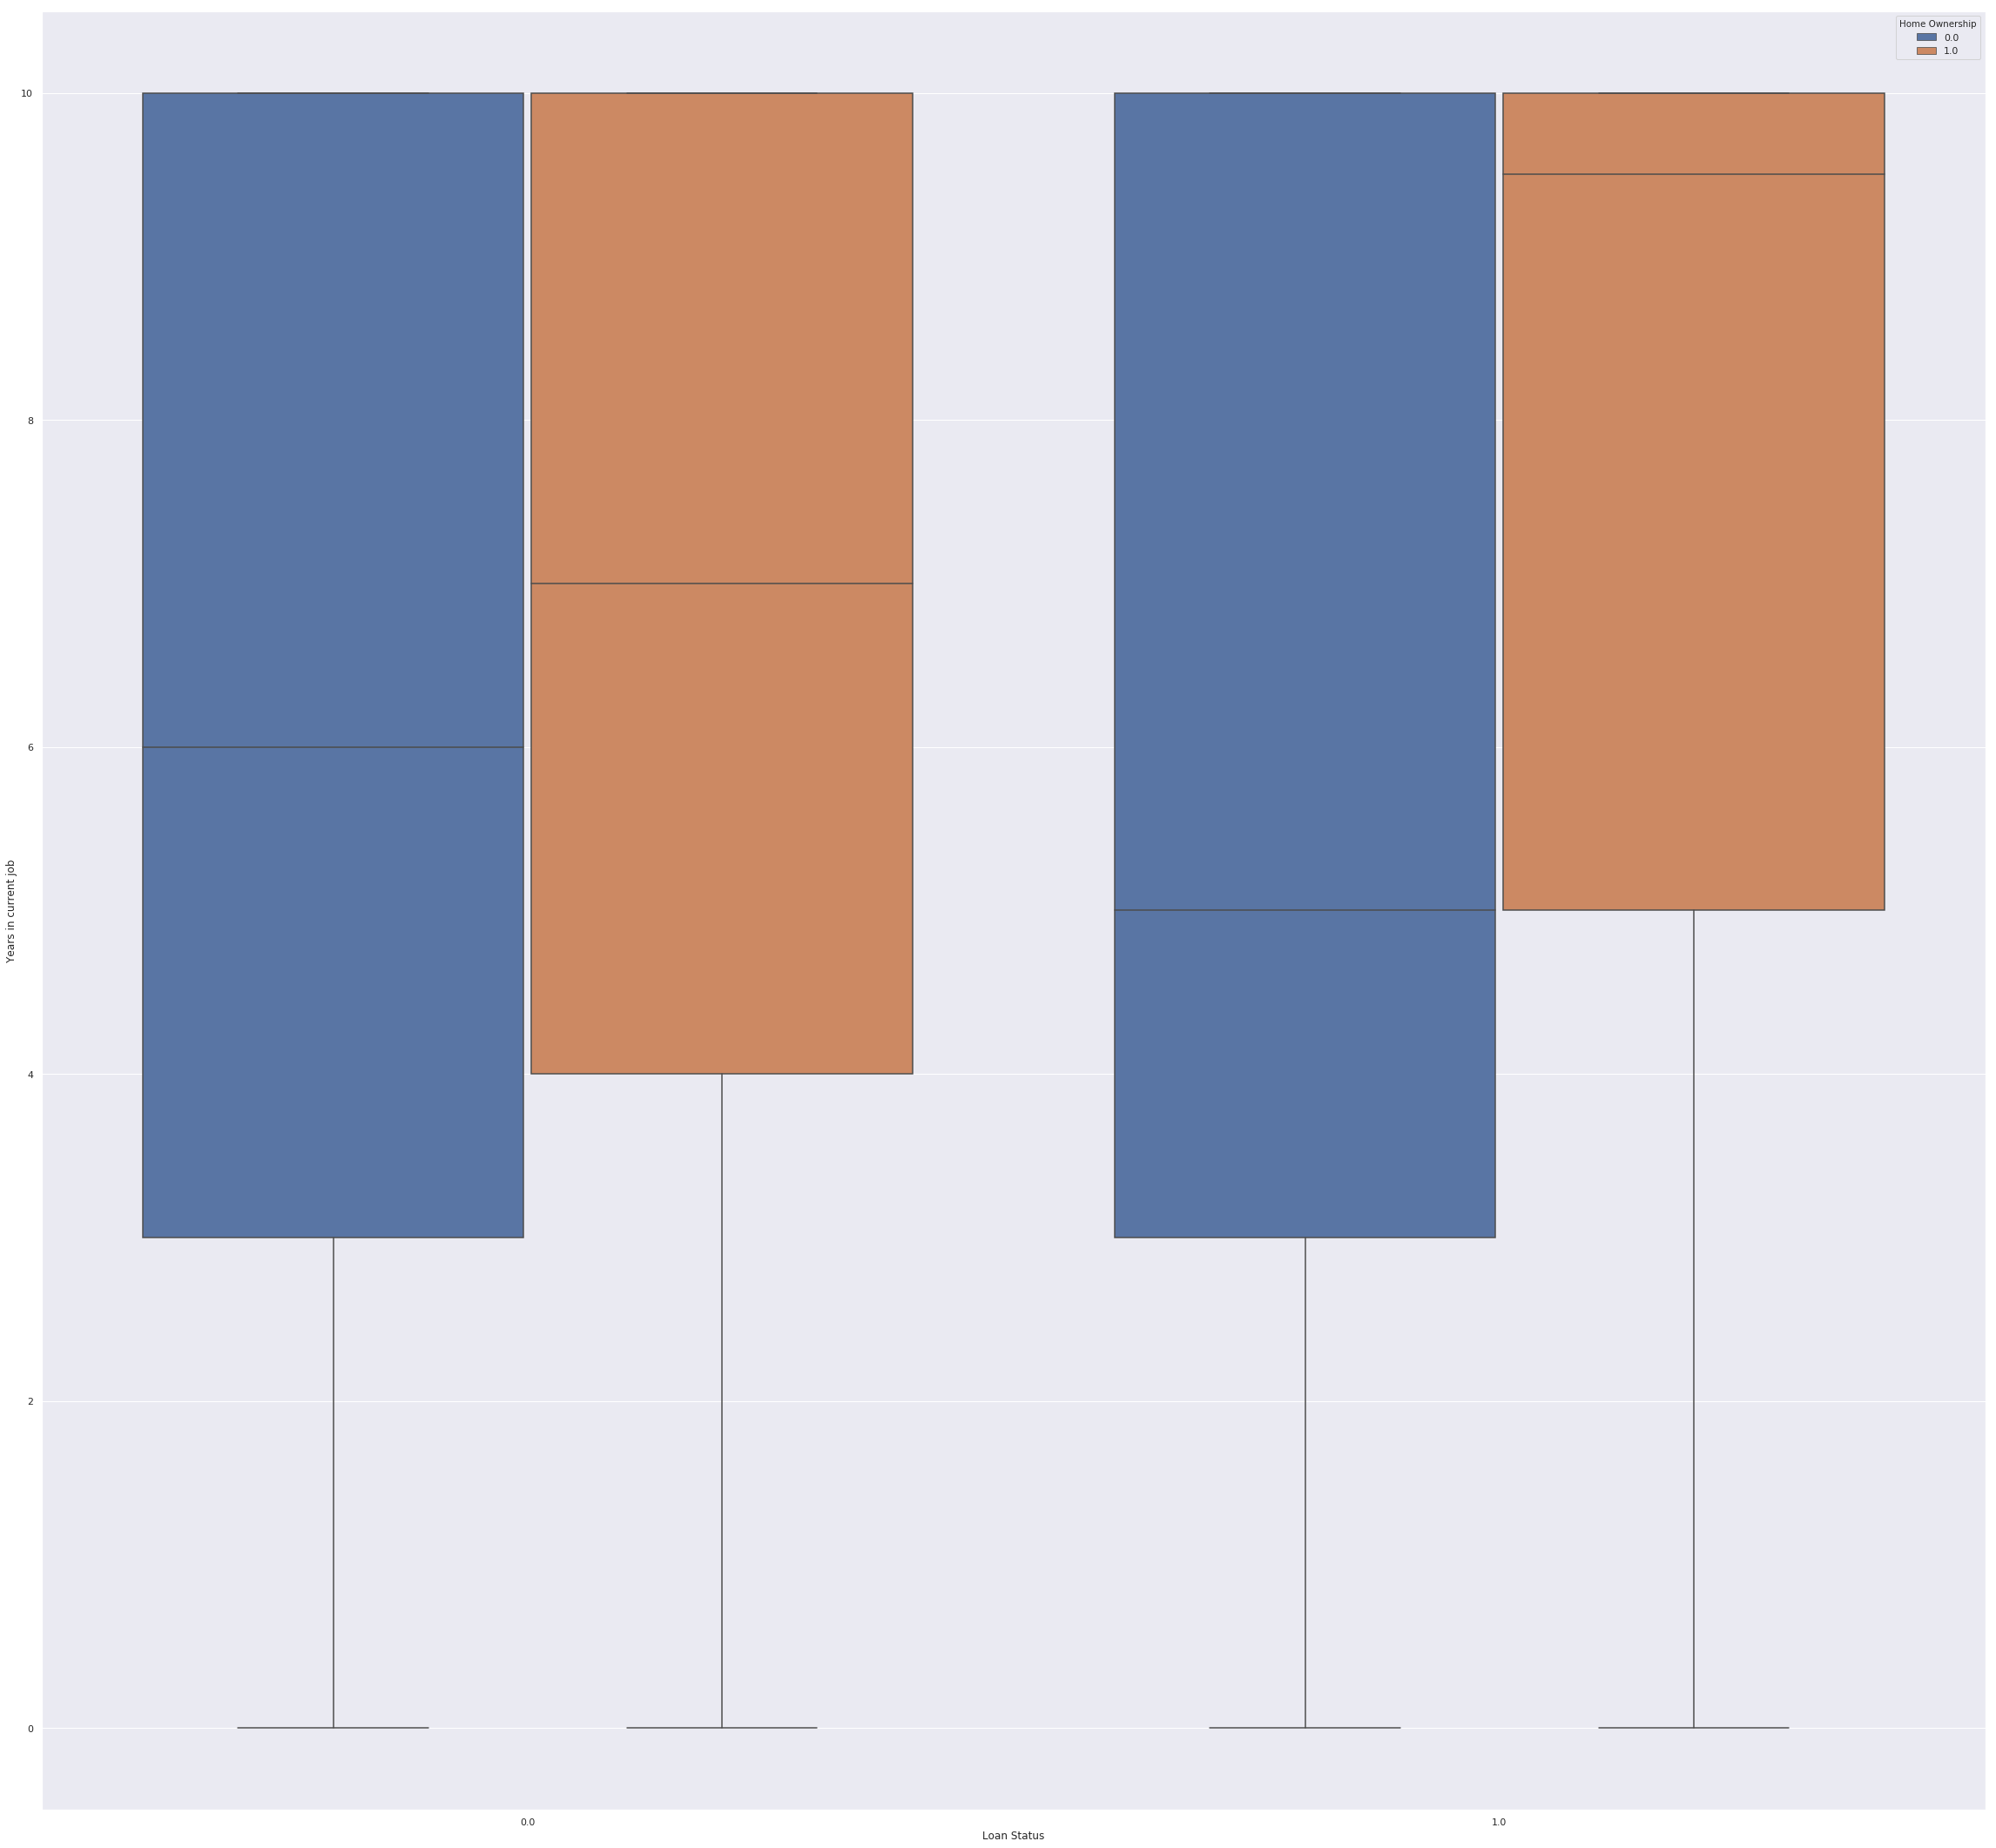

In [32]:
fig, ax = plt.subplots( figsize = (40,38) )
sns.boxplot(x = "Loan Status", y = "Years in current job", hue='Home Ownership', data = data)

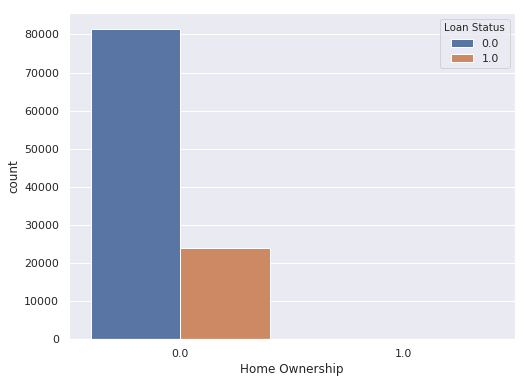

In [33]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Home Ownership', hue='Loan Status', ax=ax, data=data)

In [34]:
onehot_encoder = OneHotEncoder(sparse = False)
data['Monthly Debt'] = onehot_encoder.fit_transform(data['Monthly Debt'].values.reshape(-1, 1) )
print("onehot_encoder for Monthly Debt =",data['Monthly Debt'])

onehot_encoder for Monthly Debt = 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
105544    0.0
105545    0.0
105546    0.0
105547    0.0
105548    0.0
Name: Monthly Debt, Length: 105549, dtype: float64


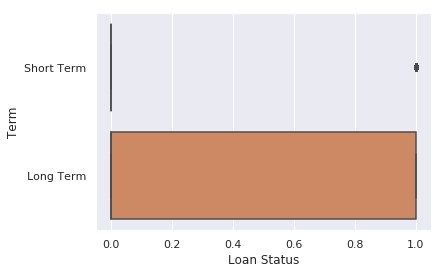

In [35]:
# Analize the relationship between the Target feature and other features
sns.boxplot(x ="Loan Status",y="Term" ,data = data)

In [36]:
onehot_encoder = OneHotEncoder(sparse = False)
data['Term'] = onehot_encoder.fit_transform(data['Term'].values.reshape(-1, 1) )
print("onehot_encoder for Term =",data['Term'])

onehot_encoder for Term = 0         0.0
1         1.0
2         0.0
3         1.0
4         0.0
         ... 
105544    1.0
105545    0.0
105546    0.0
105547    0.0
105548    1.0
Name: Term, Length: 105549, dtype: float64


In [37]:
print("length of loan status",len( data["Loan Status"]))

length of loan status 105549


In [38]:
# drop columns and features that are not needed such as 'Loan ID' and 'Customer ID'
data= data.drop(labels=['Loan ID', 'Customer ID'], axis=1)

In [39]:
# check the data types and other information
# After enconding and pre-processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105549 entries, 0 to 105548
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   105549 non-null  float64
 1   Current Loan Amount           105549 non-null  int64  
 2   Term                          105549 non-null  float64
 3   Credit Score                  105549 non-null  float64
 4   Years in current job          105549 non-null  float64
 5   Home Ownership                105549 non-null  float64
 6   Annual Income                 105549 non-null  float64
 7   Purpose                       105549 non-null  float64
 8   Monthly Debt                  105549 non-null  float64
 9   Years of Credit History       105549 non-null  float64
 10  Months since last delinquent  105549 non-null  float64
 11  Number of Open Accounts       105549 non-null  int64  
 12  Number of Credit Problems     105549 non-nul

In [40]:
# Get all the features into the X variable and target 
# column in the y variable.
X = data[['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
             'Years in current job', 'Home Ownership', 'Annual Income', 
            'Purpose', 'Monthly Debt', 'Years of Credit History', 
          'Months since last delinquent', 'Number of Open Accounts',
         'Number of Credit Problems', 'Current Credit Balance', 
          'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']]

Y = data[['Loan Status']]


In [41]:
# Convert the features into standard form.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [42]:
# Split the dataset into 80:20 ratios: 
# 80 for training and 20 for testing
#split the data 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.2, random_state = 4)


In [43]:
!pip install imbalanced-learn

In [47]:
# import and initialize the random forest classifier 
# and fit the model on training dataset

from sklearn.ensemble import RandomForestClassifier
import joblib
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [45]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(random_state=0)

In [95]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [48]:
# Analyze Feature Importance
feature_imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp
# save the trained model
joblib.dump(rfc, "./random_forest.joblib")

['./random_forest.joblib']

In [51]:
# loadthe trained random fores model
loaded_rf = joblib.load("./random_forest.joblib")
y_pred_from_loaded_rf = loaded_rf.predict(X_test)
print("y_pred = ", y_pred_from_loaded_rf)

y_pred =  [0. 0. 0. ... 0. 0. 0.]


In [61]:
# the accuracy scores

print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred_from_loaded_rf )*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred_from_loaded_rf )*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred_from_loaded_rf )*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred_from_loaded_rf )*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred_from_loaded_rf )*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 22.9843
Precision: 86.2835
F1-Score: 36.2992
Accuracy score: 81.279
AUC Score: 60.94


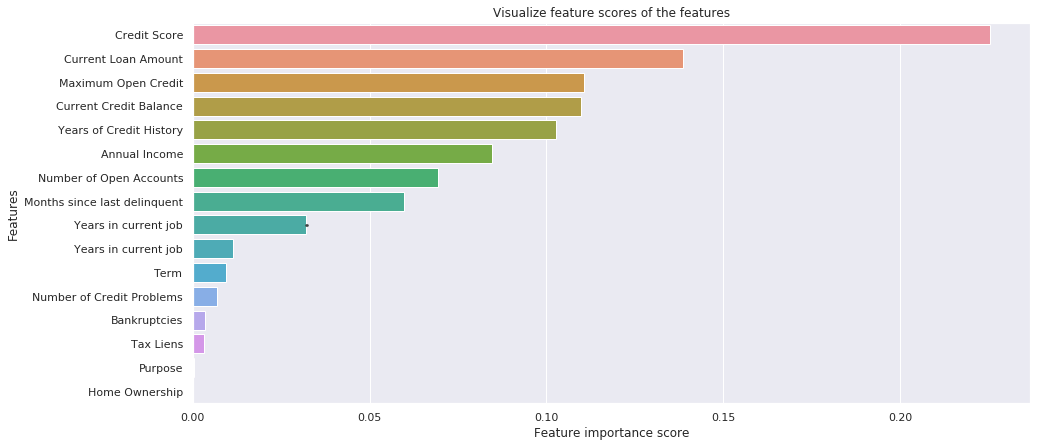

In [52]:
# Plot the Feature importance with scroes
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(x=feature_imp, y=feature_imp.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [53]:
# The feature "Credit Score" has the longest bar 
# that shows it is the most important feature in case 
# of "Loan Status" or "defaults"
# The next features that are also important are in this order:
# 2 - 'Current Loan Amount'
# 3 - 'Maximum Open Credit'
# 4 - 'Current Credit Balance'
# 
# The least important fearures are 'Home Wownership' and 'Purpose'

In [54]:
# Another training of Random Forest
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state=9)
pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])
pipeline.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


Pipeline(steps=[('smote', SMOTE(random_state=9)),
                ['classifier', RandomForestClassifier(random_state=100)]])

In [94]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}


In [55]:
# save the trained model
joblib.dump(rf_clf, "./random_forest_rf_clf.joblib")

['./random_forest_rf_clf.joblib']

In [56]:
# Predictions on the testing dataset
y_pred = pipeline.predict(X_test)

In [57]:
print("y_pred = ", y_pred)

y_pred =  [0. 0. 0. ... 1. 0. 0.]


In [58]:
# the accuracy scores

print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")


-------------------------TEST SCORES-----------------------
Recall: 36.9259
Precision: 58.3925
F1-Score: 45.242
Accuracy score: 79.2563
AUC Score: 64.4873


In [59]:
# load the trained random fores model
loaded_rf = joblib.load("./random_forest_rf_clf.joblib")
y_pred_from_loaded_rf_clf = loaded_rf.predict(X_test)
print("y_pred_rf_clf = ", y_pred_from_loaded_rf_clf)

y_pred_rf_clf =  [0. 0. 0. ... 1. 0. 0.]


In [62]:
# This part of the code is to read from a file and test
#######################################################

# Read the .csv data set
data_test = pd.read_csv("./input_data/Loan_Granting_Binary_Classification_test.csv")
#get the first few rows of the dataset 
data_test.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280,< 1 year,Rent,46643,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330,10+ years,Home Mortgage,81099,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240,9 years,Home Mortgage,60438,Home Improvements,"1,244.02",16.7,32.0,11,1,11275,14815,1.0,0
3,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860,10+ years,Home Mortgage,47003,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0
4,7e9f6759-6a13-48ef-adfa-ef9fbcfcfcc8,05301ee5-29ec-48b6-b3e5-0813ea25d684,Charged Off,11911,Short Term,7420,2 years,Home Mortgage,70475,other,886.81,17.7,NaN,13,0,28212,59897,0.0,0


In [63]:
# Understand the shape of the data
rows, columns = data_test.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 542
Columns: 19


In [64]:
# check the data types and other information
# Before enconding and pre-processing
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       542 non-null    object 
 1   Customer ID                   542 non-null    object 
 2   Loan Status                   542 non-null    object 
 3   Current Loan Amount           542 non-null    int64  
 4   Term                          542 non-null    object 
 5   Credit Score                  542 non-null    int64  
 6   Years in current job          519 non-null    object 
 7   Home Ownership                542 non-null    object 
 8   Annual Income                 542 non-null    int64  
 9   Purpose                       542 non-null    object 
 10  Monthly Debt                  542 non-null    object 
 11  Years of Credit History       542 non-null    float64
 12  Months since last delinquent  245 non-null    float64
 13  Numbe

In [65]:
# Let's check if there are any missing values in the data
# after the data pre-processing
data_test.isnull().sum()

Loan ID                           0
Customer ID                       0
Loan Status                       0
Current Loan Amount               0
Term                              0
Credit Score                      0
Years in current job             23
Home Ownership                    0
Annual Income                     0
Purpose                           0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent    297
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      1
Tax Liens                         0
dtype: int64

In [70]:
onehot_encoder = OneHotEncoder(sparse = False)
data_test['Home Ownership'] = onehot_encoder.fit_transform(data_test['Home Ownership'].values.reshape(-1, 1) )
print("onehot_encoder for Home Owenership =",data_test['Home Ownership'])


onehot_encoder for Home Owenership = 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
537    0.0
538    0.0
539    0.0
540    0.0
541    0.0
Name: Home Ownership, Length: 542, dtype: float64


In [71]:
onehot_encoder = OneHotEncoder(sparse = False)
data_test['Purpose'] = onehot_encoder.fit_transform(data_test['Purpose'].values.reshape(-1, 1) )
print("onehot_encoder for Purpose =",data_test['Purpose'])

onehot_encoder for Purpose = 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
537    0.0
538    0.0
539    0.0
540    0.0
541    0.0
Name: Purpose, Length: 542, dtype: float64


In [72]:
onehot_encoder = OneHotEncoder(sparse = False)
data_test['Loan Status'] = onehot_encoder.fit_transform(data_test['Loan Status'].values.reshape(-1, 1) )
print("onehot_encoder for Loan Status =",data_test['Loan Status'])

onehot_encoder for Loan Status = 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
537    1.0
538    1.0
539    1.0
540    1.0
541    1.0
Name: Loan Status, Length: 542, dtype: float64


In [73]:
onehot_encoder = OneHotEncoder(sparse = False)
data_test['Monthly Debt'] = onehot_encoder.fit_transform(data_test['Monthly Debt'].values.reshape(-1, 1) )
print("onehot_encoder for Monthly Debt =",data_test['Monthly Debt'])

onehot_encoder for Monthly Debt = 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
537    0.0
538    0.0
539    0.0
540    0.0
541    0.0
Name: Monthly Debt, Length: 542, dtype: float64


In [77]:
# Encoding of Categorical features
# “years_in_current_job” we just trim 
# the ‘year’ part and leave the years only
data_test["Years in current job"] = data_test["Years in current job"].replace({'-1': -1, '10+ years': 10, '8 years': 8, '6 years': 6, 
                                                                              '7 years': 7, '5 years': 5, '1 year': 1, '< 1 year': 0, 
                                                                              '4 years': 4, '3 years': 3, '2 years': 2, '9 years': 9})
print("Years in current job = ",data_test["Years in current job"] )

Years in current job =  0       0.0
1      10.0
2       9.0
3      10.0
4       2.0
       ... 
537     5.0
538     9.0
539    10.0
540     6.0
541     2.0
Name: Years in current job, Length: 542, dtype: float64


In [85]:
onehot_encoder = OneHotEncoder(sparse = False)
data_test['Term'] = onehot_encoder.fit_transform(data_test['Term'].values.reshape(-1, 1) )
print("onehot_encoder for Term =",data_test['Term'])

onehot_encoder for Term = 0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
537    0.0
538    0.0
539    1.0
540    0.0
541    1.0
Name: Term, Length: 542, dtype: float64


In [88]:
# check the data types and other information
# After enconding and pre-processing
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   542 non-null    float64
 1   Current Loan Amount           542 non-null    int64  
 2   Term                          542 non-null    float64
 3   Credit Score                  542 non-null    int64  
 4   Years in current job          542 non-null    float64
 5   Home Ownership                542 non-null    float64
 6   Annual Income                 542 non-null    int64  
 7   Purpose                       542 non-null    float64
 8   Monthly Debt                  542 non-null    float64
 9   Years of Credit History       542 non-null    float64
 10  Months since last delinquent  542 non-null    float64
 11  Number of Open Accounts       542 non-null    int64  
 12  Number of Credit Problems     542 non-null    int64  
 13  Curre

In [86]:
# we can fill the null values with the mean value from theat feature
data_test['Credit Score'].fillna(int(data_test['Credit Score'].mean()), inplace=True)
data_test['Years in current job'].fillna(int(data_test['Years in current job'].mean()), inplace=True)
data_test['Annual Income'].fillna(int(data_test['Annual Income'].mean()), inplace=True)
data_test['Months since last delinquent'].fillna(int(data_test['Months since last delinquent'].mean()), inplace=True)
data_test['Bankruptcies'].fillna(int(data_test['Bankruptcies'].mean()), inplace=True)
data_test['Tax Liens'].fillna(int(data_test['Tax Liens'].mean()), inplace=True)
data_test['Term'].fillna(int(data_test['Term'].mean()), inplace=True)


In [87]:
# Let's check if there are any missing values in the data
# after the data pre-processing
data_test.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [81]:
# drop columns and features that are not needed such as 'Loan ID' and 'Customer ID'
data_test= data_test.drop(labels=['Loan ID', 'Customer ID'], axis=1)

In [89]:
# Get all the features into the X variable and target 
# column in the y variable.
X_test = data_test[['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
             'Years in current job', 'Home Ownership', 'Annual Income', 
            'Purpose', 'Monthly Debt', 'Years of Credit History', 
          'Months since last delinquent', 'Number of Open Accounts',
         'Number of Credit Problems', 'Current Credit Balance', 
          'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']]

Y_test = data_test[['Loan Status']]

In [90]:
# load the trained random fores model
loaded_rf = joblib.load("./random_forest_rf_clf.joblib")
y_pred_from_loaded_rf_clf = loaded_rf.predict(X_test)
print("y_pred_rf_clf = ", y_pred_from_loaded_rf_clf)

y_pred_rf_clf =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [93]:
# the accuracy scores

print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(Y_test, y_pred_from_loaded_rf_clf)*100, 4) }")
print(f"Precision: { round(precision_score(Y_test, y_pred_from_loaded_rf_clf)*100, 4) }")
print(f"F1-Score: { round(f1_score(Y_test, y_pred_from_loaded_rf_clf)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(Y_test, y_pred_from_loaded_rf_clf)*100, 4) }")
#print(f"AUC Score: { round(roc_auc_score(Y_test, y_pred_from_loaded_rf_clf)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 100.0
Precision: 100.0
F1-Score: 100.0
Accuracy score: 100.0
